In [1]:
#STEP-1 Import libraries 
import numpy as np
import numpy as np
import pandas as pd 
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.datasets import load_breast_cancer
from numpy import int64
from sklearn import svm
from sklearn.svm import SVC 
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
from pyhive import hive
#from impala.dbapi import connect
from hdfs import InsecureClient
from pyhive import hive
import pandas as pd
from scipy import stats
from sklearn.utils import resample
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing
from pandas.plotting import scatter_matrix
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
import pandas as pd
from pyspark.sql import SparkSession
from pyspark import SparkContext
import pyspark.sql 
from pyspark.sql.functions import desc
from pyspark.ml.classification import MultilayerPerceptronClassifier
sc =SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

/home/smicro/.local/lib/python3.6/site-packages/pyspark/context.py:238: FutureWarning: Python 3.6 support is deprecated in Spark 3.2.
  FutureWarning
/home/smicro/.local/lib/python3.6/site-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [2]:
#STEP-2 Read data from HIVE
from pyspark.sql import HiveContext
from pyspark import SparkConf
spark = SparkSession(sc)
hive_context = HiveContext(sc)
sqlContext = SQLContext(sc)
 
#df = sqlContext.sql("SELECT * FROM sda_hdd_db.ml_smart_data_view") #per min 1 rec dataset
df = sqlContext.sql("SELECT * FROM events1.smartdata_hourly_view") #per hour 1 rec dataset

/home/smicro/.local/lib/python3.6/site-packages/pyspark/sql/context.py:604: FutureWarning: HiveContext is deprecated in Spark 2.0.0. Please use SparkSession.builder.enableHiveSupport().getOrCreate() instead.
  FutureWarning


In [3]:
#STEP-3 fill missing with zero 
df=df.na.fill(value=0)

In [4]:
# order the data in desc order 
df=df.orderBy(desc("process_date"))

In [5]:
# delete #STEP-9 take out only serial number from validation_dataset
#validation_dataset1 = pd.DataFrame(df.head(700), columns=df.columns)

#final_colums1=dataset.dtypes
# Download descriptive analysis
#final_colums1=dataset.describe()
#validation_dataset1.to_csv(r'E:\work\Supermicro\modeling\data_Q2_2019\validation_dataset1.csv')

In [6]:
#STEP-4 select columns based on 1. less missing value 2. VIF 4. Correlation
# 5. Outliers, skewness, kurtosis 6.EDA 7.Descriptive analysis ect... 
# columns_to_drop = ["smart_201_normalized","smart_17_raw","smart_245_raw","smart_201_raw","smart_218_raw","smart_16_raw","smart_170_raw","smart_180_normalized","smart_180_raw","model","serial_number","process_date","date","smart_226_raw","smart_8_normalized","smart_254_normalized","smart_12_raw","smart_192_raw","smart_196_normalized","smart_222_normalized","smart_175_raw","smart_190_normalized","smart_13_raw","smart_177_normalized","smart_190_raw","smart_202_raw","smart_255_raw", "smart_15_normalized", "smart_234_raw", "smart_255_normalized", "smart_15_raw", "smart_234_normalized", "smart_206_normalized", "smart_206_raw", "smart_248_raw", "smart_248_normalized","smart_210_raw", "smart_224_raw", "smart_18_raw", "smart_23_raw", "smart_24_raw", "smart_179_raw", "smart_181_raw", "smart_182_raw", "smart_251_normalized", "smart_250_normalized", "smart_254_raw"]

df = df.select("serial_number",
    "capacity_bytes",
"failure",
"model",
"smart_1_normalized",
"smart_1_raw",
"smart_2_normalized",
"smart_2_raw",
"smart_3_normalized",
"smart_3_raw",
"smart_4_normalized",
"smart_4_raw",
"smart_5_normalized",
"smart_5_raw",
"smart_7_normalized",
"smart_7_raw",
"smart_8_raw",
"smart_9_normalized",
"smart_9_raw",
"smart_10_normalized",
"smart_10_raw",
"smart_11_normalized",
"smart_11_raw",
"smart_12_normalized",
"smart_13_normalized",
"smart_16_normalized",
"smart_17_normalized",
"smart_18_normalized",
"smart_22_normalized",
"smart_22_raw",
"smart_23_normalized",
"smart_24_normalized",
"smart_168_normalized",
"smart_168_raw",
"smart_170_normalized",
"smart_173_normalized",
"smart_173_raw",
"smart_174_normalized",
"smart_174_raw",
"smart_175_normalized",
"smart_177_raw",
"smart_179_normalized",
"smart_181_normalized",
"smart_182_normalized",
"smart_183_normalized",
"smart_183_raw",
"smart_184_normalized",
"smart_184_raw",
"smart_187_normalized",
"smart_187_raw",
"smart_188_normalized",
"smart_188_raw",
"smart_189_normalized",
"smart_189_raw",
"smart_191_normalized",
"smart_191_raw",
"smart_192_normalized",
"smart_193_normalized",
"smart_193_raw",
"smart_194_normalized",
"smart_194_raw",
"smart_195_normalized",
"smart_195_raw",
"smart_196_raw",
"smart_197_normalized",
"smart_197_raw",
"smart_198_normalized",
"smart_198_raw",
"smart_199_normalized",
"smart_199_raw",
"smart_200_normalized",
"smart_200_raw",
"smart_202_normalized",
"smart_210_normalized",
"smart_218_normalized",
"smart_220_normalized",
"smart_220_raw",
"smart_222_raw",
"smart_223_normalized",
"smart_223_raw",
"smart_224_normalized",
"smart_225_normalized",
"smart_225_raw",
"smart_226_normalized",
"smart_231_normalized",
"smart_231_raw",
"smart_232_normalized",
"smart_232_raw",
"smart_233_normalized",
"smart_233_raw",
"smart_235_normalized",
"smart_235_raw",
"smart_240_normalized",
"smart_240_raw",
"smart_241_normalized",
"smart_241_raw",
"smart_242_normalized",
"smart_242_raw",
"smart_245_normalized",
"smart_247_normalized",
"smart_247_raw",
"smart_250_raw",
"smart_251_raw",
"smart_252_normalized",
"smart_252_raw",
"smart_160_normalized",
"smart_160_raw",
"smart_161_normalized",
"smart_161_raw",
"smart_163_normalized",
"smart_163_raw",
"smart_164_normalized",
"smart_164_raw",
"smart_165_normalized",
"smart_165_raw",
"smart_166_normalized",
"smart_166_raw",
"smart_167_normalized",
"smart_167_raw",
"smart_169_normalized",
"smart_169_raw",
"smart_176_normalized",
"smart_176_raw",
"smart_178_normalized",
"smart_178_raw")
cols = df.columns
#df.printSchema()

In [7]:
#STEP-5 OneHotEncoder   
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
categoricalColumns = ['model','serial_number']
stages = []

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
    
label_stringIdx = StringIndexer(inputCol = 'failure', outputCol = 'label')
stages += [label_stringIdx]

In [8]:
#STEP-6 select numericCols
numericCols = ["capacity_bytes",
"smart_1_normalized",
"smart_1_raw",
"smart_2_normalized",
"smart_2_raw",
"smart_3_normalized",
"smart_3_raw",
"smart_4_normalized",
"smart_4_raw",
"smart_5_normalized",
"smart_5_raw",
"smart_7_normalized",
"smart_7_raw",
"smart_8_raw",
"smart_9_normalized",
"smart_9_raw",
"smart_10_normalized",
"smart_10_raw",
"smart_11_normalized",
"smart_11_raw",
"smart_12_normalized",
"smart_13_normalized",
"smart_16_normalized",
"smart_17_normalized",
"smart_18_normalized",
"smart_22_normalized",
"smart_22_raw",
"smart_23_normalized",
"smart_24_normalized",
"smart_168_normalized",
"smart_168_raw",
"smart_170_normalized",
"smart_173_normalized",
"smart_173_raw",
"smart_174_normalized",
"smart_174_raw",
"smart_175_normalized",
"smart_177_raw",
"smart_179_normalized",
"smart_181_normalized",
"smart_182_normalized",
"smart_183_normalized",
"smart_183_raw",
"smart_184_normalized",
"smart_184_raw",
"smart_187_normalized",
"smart_187_raw",
"smart_188_normalized",
"smart_188_raw",
"smart_189_normalized",
"smart_189_raw",
"smart_191_normalized",
"smart_191_raw",
"smart_192_normalized",
"smart_193_normalized",
"smart_193_raw",
"smart_194_normalized",
"smart_194_raw",
"smart_195_normalized",
"smart_195_raw",
"smart_196_raw",
"smart_197_normalized",
"smart_197_raw",
"smart_198_normalized",
"smart_198_raw",
"smart_199_normalized",
"smart_199_raw",
"smart_200_normalized",
"smart_200_raw",
"smart_202_normalized",
"smart_210_normalized",
"smart_218_normalized",
"smart_220_normalized",
"smart_220_raw",
"smart_222_raw",
"smart_223_normalized",
"smart_223_raw",
"smart_224_normalized",
"smart_225_normalized",
"smart_225_raw",
"smart_226_normalized",
"smart_231_normalized",
"smart_231_raw",
"smart_232_normalized",
"smart_232_raw",
"smart_233_normalized",
"smart_233_raw",
"smart_235_normalized",
"smart_235_raw",
"smart_240_normalized",
"smart_240_raw",
"smart_241_normalized",
"smart_241_raw",
"smart_242_normalized",
"smart_242_raw",
"smart_245_normalized",
"smart_247_normalized",
"smart_247_raw",
"smart_250_raw",
"smart_251_raw",
"smart_252_normalized",
"smart_252_raw",
"smart_160_normalized",
"smart_160_raw",
"smart_161_normalized",
"smart_161_raw",
"smart_163_normalized",
"smart_163_raw",
"smart_164_normalized",
"smart_164_raw",
"smart_165_normalized",
"smart_165_raw",
"smart_166_normalized",
"smart_166_raw",
"smart_167_normalized",
"smart_167_raw",
"smart_169_normalized",
"smart_169_raw",
"smart_176_normalized",
"smart_176_raw",
"smart_178_normalized",
"smart_178_raw"]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [9]:
#STEP-7 Y - Variable selection 
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)


In [10]:
#STEP-8 data split 
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))
train_serial_number=train.select('serial_number')
#train_serial_number.show()
test_serial_number=test.select('serial_number')
#test_serial_number.show()

Training Dataset Count: 37080
Test Dataset Count: 15822


In [11]:
#STEP-9 take out only serial number from validation_dataset
validation_dataset1 = pd.DataFrame(df.head(700), columns=df.columns)
#validation_dataset1 = pd.DataFrame(df.tail(100), columns=df.columns) 
from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)
validation_dataset1 = sqlContext.createDataFrame(validation_dataset1)
validation_serial_number=validation_dataset1.select('serial_number')

In [12]:
#STEP-10 drop serial_number once created different data for serial number from validation_dataset
columns_to_drop = ["serial_number"]
train = train.drop(*columns_to_drop)
test = test.drop(*columns_to_drop)
df = test.drop(*columns_to_drop)
validation_dataset1 = validation_dataset1.drop(*columns_to_drop)

In [13]:
######################################### modeling step ###################

In [14]:
#STEP-11 model 1: LogisticRegression # failure # label
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'failure', maxIter=10)
lrModel = lr.fit(train)

In [15]:
#STEP-12 accuracy of the lrModel # failure # label
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# Make predicitons
predictionAndTarget = lrModel.transform(test).select("failure", "prediction")

predictionAndTargetNumpy = np.array((predictionAndTarget.collect()))

acc = accuracy_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
f1 = f1_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
precision = precision_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
recall = recall_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
auc = roc_auc_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
print(acc,precision,recall,f1,auc) # lrModel

0.9988623435722411 0.9979157017137563 1.0 0.9989567636490089 0.9987506940588562


In [16]:
#STEP-13 predictions with validation data  # failure # label
predictions = lrModel.transform(validation_dataset1)
final1=predictions.select('model', 'failure', 'rawPrediction', 'prediction', 'probability')
#row_number = final1.count()
#row_number
from pyspark.sql.types import LongType
from pyspark.sql import Row
def zipindexdf(df):
    schema_new = df.schema.add("index", LongType(), False)
    return df.rdd.zipWithIndex().map(lambda l: list(l[0]) + [l[1]]).toDF(schema_new)

validation_serial_number_index = zipindexdf(validation_serial_number)
#validation_serial_number_index.show()
final1_index = zipindexdf(final1)
#final_index.show()
final1_model_results = validation_serial_number_index.join(final1_index, "index", "inner")
final1_model_results = final1_model_results.withColumnRenamed("rawPrediction", "Confidence_Level")
final1_model_results.show()

+-----+---------------+--------------------+-------+--------------------+----------+--------------------+
|index|  serial_number|               model|failure|    Confidence_Level|prediction|         probability|
+-----+---------------+--------------------+-------+--------------------+----------+--------------------+
|   26| MK0371YHK3Y4MG|Hitachi HUA723030...|      0|[7.48461295927121...|       0.0|[0.99943865477204...|
|   29|       Z1Y45E7R| ST3000NM0033-9ZM178|      0|[7.03207434236296...|       0.0|[0.99911768114236...|
|  474|WD-WCC5ZEZ5NDRN|WDC WD500VF4PZ-49...|      0|[7.53089876303461...|       0.0|[0.99946403134354...|
|   65| MK0371YHKB65WA|Hitachi HUA723030...|      0|[7.48612037188067...|       0.0|[0.99943949983954...|
|  191| STN604MH11MXXB|Hitachi HDE721010...|      0|[7.52502453241129...|       0.0|[0.99946087537707...|
|  418| MK0371YHKB457A|Hitachi HUA723030...|      0|[7.49116794868234...|       0.0|[0.99944232030513...|
|  541|       Z1Y44P79| ST3000NM0033-9ZM178|  

In [17]:
# STEP-14 Download the predictions results
pandasDF = final1_model_results.toPandas()
#pandasDF.label.replace((0, 1), ('Active', 'fail'), inplace=True)
pandasDF.failure.replace((0, 1), ('Active', 'fail'), inplace=True)
pandasDF.prediction.replace((0, 1), ('Active', 'Predicted_to_be_fail'), inplace=True)

pandasDF['Confidence_Level'] = pandasDF['Confidence_Level'].astype('str')
pandasDF['probability'] = pandasDF['probability'].astype('str')
Confidence_Level=pandasDF['Confidence_Level'].str.split(',', expand=True)
pandasDF = pandasDF.join(Confidence_Level).drop(1, axis=1)
pandasDF = pandasDF.drop(['Confidence_Level'], 1)
pandasDF.rename(columns = {0:'Confidence_Level'}, inplace = True)
probability1=pandasDF['probability'].str.split(',', expand=True)
probability1.rename(columns = {0:'Active_Probability'}, inplace = True)
probability1.rename(columns = {1:'Failure_Probability'}, inplace = True)
pandasDF = pandasDF.join(probability1)
pandasDF = pandasDF.drop(['probability'], 1)
pandasDF = pandasDF.drop(['index'], 1)
pandasDF.rename(columns = {'serial_number':'Serial_Number'}, inplace = True)
pandasDF.rename(columns = {'model':'Model'}, inplace = True)
pandasDF.rename(columns = {'label':'Actaul'}, inplace = True)
pandasDF.rename(columns = {'prediction':'Prediction'}, inplace = True)
pandasDF=pandasDF.replace('\]','',regex=True).astype(str)
pandasDF=pandasDF.replace('\[','',regex=True).astype(str)

#pandasDF=pandasDF.groupby(['Serial_Number']).min()

pandasDF.sort_values(by=['Prediction'], inplace=True, ascending=False)
pandasDF.sort_values(by=['Active_Probability'], inplace=True)
# download csv file 
pandasDF.to_csv(r'E:\home\smicro\ML-Ganesh\modelPrediction\Prediction_Results.csv')
# download excel file 
#pandasDF = final1_model_results.toPandas()
writer = pd.ExcelWriter("Prediction_Results_ML.xlsx")
pandasDF.to_excel(excel_writer=writer, sheet_name='Sheet1', na_rep="")
writer.save()

In [ ]:
###############################################################################################################

In [63]:
#STEP-11 DecisionTreeClassifier
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'failure', maxDepth = 3)
dtModel = dt.fit(train)
#predictions = dtModel.transform(test)
#predictions1=predictions.select('model', 'failure', 'rawPrediction', 'prediction', 'probability')
#predictions1.show(10)

In [64]:
#STEP-12 accuracy of the DecisionTreeClassifier 
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# Make predicitons
predictionAndTarget = dtModel.transform(test).select("failure", "prediction")
predictionAndTargetNumpy = np.array((predictionAndTarget.collect()))

acc = accuracy_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
f1 = f1_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
precision = precision_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
recall = recall_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
auc = roc_auc_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
print(acc,precision,recall,f1,auc) # DecisionTreeClassifier

0.9972905525846703 0.9955901125681792 1.0 0.997790183763666 0.9965112008813809


In [65]:
#STEP-13 predictions with validation data  # failure # label
predictions = dtModel.transform(validation_dataset1)
final1=predictions.select('model', 'failure', 'rawPrediction', 'prediction', 'probability')
#row_number = final1.count()
#row_number
from pyspark.sql.types import LongType
from pyspark.sql import Row
def zipindexdf(df):
    schema_new = df.schema.add("index", LongType(), False)
    return df.rdd.zipWithIndex().map(lambda l: list(l[0]) + [l[1]]).toDF(schema_new)

validation_serial_number_index = zipindexdf(validation_serial_number)
#validation_serial_number_index.show()
final1_index = zipindexdf(final1)
#final_index.show()
final1_model_results = validation_serial_number_index.join(final1_index, "index", "inner")
final1_model_results = final1_model_results.withColumnRenamed("rawPrediction", "Confidence_Level")
final1_model_results.show()

+-----+---------------+--------------------+-------+----------------+----------+-----------+
|index|  serial_number|               model|failure|Confidence_Level|prediction|probability|
+-----+---------------+--------------------+-------+----------------+----------+-----------+
|   26| MK0371YHK3Y4MG|Hitachi HUA723030...|      0|   [12552.0,0.0]|       0.0|  [1.0,0.0]|
|   29|       Z1Y45E7R| ST3000NM0033-9ZM178|      0|   [12552.0,0.0]|       0.0|  [1.0,0.0]|
|  474| MK0271YGJA4WUA|Hitachi HUA723020...|      0|   [12552.0,0.0]|       0.0|  [1.0,0.0]|
|   65|       Z1Y45RA5| ST3000NM0033-9ZM178|      0|   [12552.0,0.0]|       0.0|  [1.0,0.0]|
|  191|WD-WCAYU8376963|WDC WD5002AALX-00...|      0|   [12552.0,0.0]|       0.0|  [1.0,0.0]|
|  418|       Z4D07P8Q| ST6000NM0024-1HT17Z|      0|   [12552.0,0.0]|       0.0|  [1.0,0.0]|
|  541|       Z1Y44P79| ST3000NM0033-9ZM178|      0|   [12552.0,0.0]|       0.0|  [1.0,0.0]|
|  558|       Z1Y45RA5| ST3000NM0033-9ZM178|      0|   [12552.0,0.0]| 

In [66]:
# STEP-14 Download the predictions results
pandasDF = final1_model_results.toPandas()
#pandasDF.label.replace((0, 1), ('Active', 'fail'), inplace=True)
pandasDF.failure.replace((0, 1), ('Active', 'fail'), inplace=True)
pandasDF.prediction.replace((0, 1), ('Active', 'Predicted_to_be_fail'), inplace=True)

pandasDF['Confidence_Level'] = pandasDF['Confidence_Level'].astype('str')
pandasDF['probability'] = pandasDF['probability'].astype('str')
Confidence_Level=pandasDF['Confidence_Level'].str.split(',', expand=True)
pandasDF = pandasDF.join(Confidence_Level).drop(1, axis=1)
pandasDF = pandasDF.drop(['Confidence_Level'], 1)
pandasDF.rename(columns = {0:'Confidence_Level'}, inplace = True)
probability1=pandasDF['probability'].str.split(',', expand=True)
probability1.rename(columns = {0:'Active_Probability'}, inplace = True)
probability1.rename(columns = {1:'Failure_Probability'}, inplace = True)
pandasDF = pandasDF.join(probability1)
pandasDF = pandasDF.drop(['probability'], 1)
pandasDF = pandasDF.drop(['index'], 1)
pandasDF.rename(columns = {'serial_number':'Serial_Number'}, inplace = True)
pandasDF.rename(columns = {'model':'Model'}, inplace = True)
pandasDF.rename(columns = {'label':'Actaul'}, inplace = True)
pandasDF.rename(columns = {'prediction':'Prediction'}, inplace = True)
pandasDF=pandasDF.replace('\]','',regex=True).astype(str)
pandasDF=pandasDF.replace('\[','',regex=True).astype(str)

#pandasDF=pandasDF.groupby(['Serial_Number']).min()

pandasDF.sort_values(by=['Prediction'], inplace=True, ascending=False)
pandasDF.sort_values(by=['Active_Probability'], inplace=True)
# download csv file 
pandasDF.to_csv(r'E:\home\smicro\ML-Ganesh\modelPrediction\Prediction_Results.csv')
# download excel file 
#pandasDF = final1_model_results.toPandas()
writer = pd.ExcelWriter("Prediction_Results_ML.xlsx")
pandasDF.to_excel(excel_writer=writer, sheet_name='Sheet1', na_rep="")
writer.save()

In [ ]:
#############################################################

In [67]:
#STEP-11 model 3 RandomForestClassifier
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'failure')
rfModel = rf.fit(train)
#predictions = rfModel.transform(test)
#predictions2=predictions.select('model', 'label', 'rawPrediction', 'prediction', 'probability')
#predictions2.show(10)

In [68]:
#STEP-12 accuracy of the RandomForestClassifier 
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# Make predicitons
predictionAndTarget = rfModel.transform(test).select("failure", "prediction")

predictionAndTargetNumpy = np.array((predictionAndTarget.collect()))

acc = accuracy_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
f1 = f1_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
precision = precision_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
recall = recall_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
auc = roc_auc_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
print(acc,precision,recall,f1,auc) # RandomForestClassifier

0.9938667807730709 1.0 0.9899696757639375 0.9949595592544835 0.9949848378819688


In [69]:

#STEP-13 predictions with validation data  # failure # label
predictions = rfModel.transform(validation_dataset1)
final1=predictions.select('model', 'failure', 'rawPrediction', 'prediction', 'probability')
#row_number = final1.count()
#row_number
from pyspark.sql.types import LongType
from pyspark.sql import Row
def zipindexdf(df):
    schema_new = df.schema.add("index", LongType(), False)
    return df.rdd.zipWithIndex().map(lambda l: list(l[0]) + [l[1]]).toDF(schema_new)

validation_serial_number_index = zipindexdf(validation_serial_number)
#validation_serial_number_index.show()
final1_index = zipindexdf(final1)
#final_index.show()
final1_model_results = validation_serial_number_index.join(final1_index, "index", "inner")
final1_model_results = final1_model_results.withColumnRenamed("rawPrediction", "Confidence_Level")
final1_model_results.show()

Py4JJavaError: An error occurred while calling o3227.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 4 in stage 326.0 failed 1 times, most recent failure: Lost task 4.0 in stage 326.0 (TID 22383) (sm1.dev.com executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/smicro/spark/spark-3.1.2-bin-hadoop3.2/python/lib/pyspark.zip/pyspark/worker.py", line 604, in main
    process()
  File "/opt/smicro/spark/spark-3.1.2-bin-hadoop3.2/python/lib/pyspark.zip/pyspark/worker.py", line 596, in process
    serializer.dump_stream(out_iter, outfile)
  File "/opt/smicro/spark/spark-3.1.2-bin-hadoop3.2/python/lib/pyspark.zip/pyspark/serializers.py", line 259, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/opt/smicro/spark/spark-3.1.2-bin-hadoop3.2/python/lib/pyspark.zip/pyspark/util.py", line 73, in wrapper
    return f(*args, **kwargs)
  File "/home/smicro/.local/lib/python3.6/site-packages/pyspark/sql/session.py", line 682, in prepare
    verify_func(obj)
  File "/home/smicro/.local/lib/python3.6/site-packages/pyspark/sql/types.py", line 1411, in verify
    verify_value(obj)
  File "/home/smicro/.local/lib/python3.6/site-packages/pyspark/sql/types.py", line 1390, in verify_struct
    "length of fields (%d)" % (len(obj), len(verifiers))))
ValueError: Length of object (2) does not match with length of fields (3)

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:517)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:652)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:635)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:470)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:489)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:132)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2258)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2206)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2445)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2387)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2376)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2196)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2217)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2236)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:472)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:425)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:47)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:3696)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3687)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3685)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2929)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:301)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:338)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/smicro/spark/spark-3.1.2-bin-hadoop3.2/python/lib/pyspark.zip/pyspark/worker.py", line 604, in main
    process()
  File "/opt/smicro/spark/spark-3.1.2-bin-hadoop3.2/python/lib/pyspark.zip/pyspark/worker.py", line 596, in process
    serializer.dump_stream(out_iter, outfile)
  File "/opt/smicro/spark/spark-3.1.2-bin-hadoop3.2/python/lib/pyspark.zip/pyspark/serializers.py", line 259, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/opt/smicro/spark/spark-3.1.2-bin-hadoop3.2/python/lib/pyspark.zip/pyspark/util.py", line 73, in wrapper
    return f(*args, **kwargs)
  File "/home/smicro/.local/lib/python3.6/site-packages/pyspark/sql/session.py", line 682, in prepare
    verify_func(obj)
  File "/home/smicro/.local/lib/python3.6/site-packages/pyspark/sql/types.py", line 1411, in verify
    verify_value(obj)
  File "/home/smicro/.local/lib/python3.6/site-packages/pyspark/sql/types.py", line 1390, in verify_struct
    "length of fields (%d)" % (len(obj), len(verifiers))))
ValueError: Length of object (2) does not match with length of fields (3)

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:517)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:652)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:635)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:470)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:489)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:132)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [ ]:
# STEP-14 Download the predictions results
pandasDF = final1_model_results.toPandas()
#pandasDF.label.replace((0, 1), ('Active', 'fail'), inplace=True)
pandasDF.failure.replace((0, 1), ('Active', 'fail'), inplace=True)
pandasDF.prediction.replace((0, 1), ('Active', 'Predicted_to_be_fail'), inplace=True)

pandasDF['Confidence_Level'] = pandasDF['Confidence_Level'].astype('str')
pandasDF['probability'] = pandasDF['probability'].astype('str')
Confidence_Level=pandasDF['Confidence_Level'].str.split(',', expand=True)
pandasDF = pandasDF.join(Confidence_Level).drop(1, axis=1)
pandasDF = pandasDF.drop(['Confidence_Level'], 1)
pandasDF.rename(columns = {0:'Confidence_Level'}, inplace = True)
probability1=pandasDF['probability'].str.split(',', expand=True)
probability1.rename(columns = {0:'Active_Probability'}, inplace = True)
probability1.rename(columns = {1:'Failure_Probability'}, inplace = True)
pandasDF = pandasDF.join(probability1)
pandasDF = pandasDF.drop(['probability'], 1)
pandasDF = pandasDF.drop(['index'], 1)
pandasDF.rename(columns = {'serial_number':'Serial_Number'}, inplace = True)
pandasDF.rename(columns = {'model':'Model'}, inplace = True)
pandasDF.rename(columns = {'label':'Actaul'}, inplace = True)
pandasDF.rename(columns = {'prediction':'Prediction'}, inplace = True)
pandasDF=pandasDF.replace('\]','',regex=True).astype(str)
pandasDF=pandasDF.replace('\[','',regex=True).astype(str)

#pandasDF=pandasDF.groupby(['Serial_Number']).min()

pandasDF.sort_values(by=['Prediction'], inplace=True, ascending=False)
pandasDF.sort_values(by=['Active_Probability'], inplace=True)
# download csv file 
pandasDF.to_csv(r'E:\home\smicro\ML-Ganesh\modelPrediction\Prediction_Results.csv')
# download excel file 
#pandasDF = final1_model_results.toPandas()
writer = pd.ExcelWriter("Prediction_Results_ML.xlsx")
pandasDF.to_excel(excel_writer=writer, sheet_name='Sheet1', na_rep="")
writer.save()

In [ ]:
#############################################################################################################

In [ ]:
#STEP-11 model 4 GBTClassifier
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(featuresCol = 'features', labelCol = 'failure', maxIter=10)
gbtModel = gbt.fit(train)

#from pyspark.ml.classification import GBTClassifier
#gbt = GBTClassifier(maxIter=10)
#gbtModel = gbt.fit(train)
#predictions = gbtModel.transform(test)
#predictions3=predictions.select('model', 'failure', 'rawPrediction', 'prediction', 'probability')
#predictions3.show(10)



In [14]:
#STEP-12 accuracy of the GBTClassifier 
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# Make predicitons
predictionAndTarget = gbtModel.transform(test).select("failure", "prediction")

predictionAndTargetNumpy = np.array((predictionAndTarget.collect()))

acc = accuracy_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
f1 = f1_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
precision = precision_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
recall = recall_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
auc = roc_auc_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
print(acc,precision,recall,f1,auc) # GBTClassifier

0.9997860657491264 0.9997666277712952 0.9998833002684094 0.9998249606161387 0.9997582984657045


In [15]:
#STEP-13 predictions with validation data  # failure # label
predictions = gbtModel.transform(validation_dataset1)
final1=predictions.select('model', 'failure', 'rawPrediction', 'prediction', 'probability')
#row_number = final1.count()
#row_number
from pyspark.sql.types import LongType
from pyspark.sql import Row
def zipindexdf(df):
    schema_new = df.schema.add("index", LongType(), False)
    return df.rdd.zipWithIndex().map(lambda l: list(l[0]) + [l[1]]).toDF(schema_new)

validation_serial_number_index = zipindexdf(validation_serial_number)
#validation_serial_number_index.show()
final1_index = zipindexdf(final1)
#final_index.show()
final1_model_results = validation_serial_number_index.join(final1_index, "index", "inner")
final1_model_results = final1_model_results.withColumnRenamed("rawPrediction", "Confidence_Level")
final1_model_results.show()

+-----+---------------+--------------------+-------+--------------------+----------+--------------------+
|index|  serial_number|               model|failure|    Confidence_Level|prediction|         probability|
+-----+---------------+--------------------+-------+--------------------+----------+--------------------+
|   26| MK0371YHK3Y4MG|Hitachi HUA723030...|      0|[1.32590267922033...|       0.0|[0.93412217565278...|
|   29|       Z1Y45E7R| ST3000NM0033-9ZM178|      0|[1.32590267922033...|       0.0|[0.93412217565278...|
|  474| MK0271YGJA4WUA|Hitachi HUA723020...|      0|[1.32590267922033...|       0.0|[0.93412217565278...|
|   65|       Z1Y45RA5| ST3000NM0033-9ZM178|      0|[1.32590267922033...|       0.0|[0.93412217565278...|
|  191|WD-WCAYU8376963|WDC WD5002AALX-00...|      0|[1.32590267922033...|       0.0|[0.93412217565278...|
|  418|       Z4D07P8Q| ST6000NM0024-1HT17Z|      0|[1.32590267922033...|       0.0|[0.93412217565278...|
|  541|       Z1Y44P79| ST3000NM0033-9ZM178|  

In [16]:
# STEP-14 Download the predictions results
pandasDF = final1_model_results.toPandas()
#pandasDF.label.replace((0, 1), ('Active', 'fail'), inplace=True)
pandasDF.failure.replace((0, 1), ('Active', 'fail'), inplace=True)
pandasDF.prediction.replace((0, 1), ('Active', 'Predicted_to_be_fail'), inplace=True)

pandasDF['Confidence_Level'] = pandasDF['Confidence_Level'].astype('str')
pandasDF['probability'] = pandasDF['probability'].astype('str')
Confidence_Level=pandasDF['Confidence_Level'].str.split(',', expand=True)
pandasDF = pandasDF.join(Confidence_Level).drop(1, axis=1)
pandasDF = pandasDF.drop(['Confidence_Level'], 1)
pandasDF.rename(columns = {0:'Confidence_Level'}, inplace = True)
probability1=pandasDF['probability'].str.split(',', expand=True)
probability1.rename(columns = {0:'Active_Probability'}, inplace = True)
probability1.rename(columns = {1:'Failure_Probability'}, inplace = True)
pandasDF = pandasDF.join(probability1)
pandasDF = pandasDF.drop(['probability'], 1)
pandasDF = pandasDF.drop(['index'], 1)
pandasDF.rename(columns = {'serial_number':'Serial_Number'}, inplace = True)
pandasDF.rename(columns = {'model':'Model'}, inplace = True)
pandasDF.rename(columns = {'label':'Actaul'}, inplace = True)
pandasDF.rename(columns = {'prediction':'Prediction'}, inplace = True)
pandasDF=pandasDF.replace('\]','',regex=True).astype(str)
pandasDF=pandasDF.replace('\[','',regex=True).astype(str)

#pandasDF=pandasDF.groupby(['Serial_Number']).min()

pandasDF.sort_values(by=['Prediction'], inplace=True, ascending=False)
pandasDF.sort_values(by=['Active_Probability'], inplace=True)
# download csv file 
pandasDF.to_csv(r'E:\home\smicro\ML-Ganesh\modelPrediction\Prediction_Results.csv')
# download excel file 
#pandasDF = final1_model_results.toPandas()
writer = pd.ExcelWriter("Prediction_Results_ML.xlsx")
pandasDF.to_excel(excel_writer=writer, sheet_name='Sheet1', na_rep="")
writer.save()

In [ ]:
#####################################################

In [34]:
#STEP-12 accuracy of the lsvc  / lsvcModel
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# Make predicitons
predictionAndTarget = lsvcModel.transform(test).select("failure", "prediction")

predictionAndTargetNumpy = np.array((predictionAndTarget.collect()))

acc = accuracy_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
f1 = f1_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
precision = precision_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
recall = recall_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
auc = roc_auc_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
print(acc,precision,recall,f1,auc) # lsvcModel

0.9858523065965797 1.0 0.8178056926374557 0.8997723969616366 0.9089028463187279


In [49]:
#STEP-13 predictions with validation data  # failure # label
predictions = lsvcModel.transform(validation_dataset1)
final1=predictions.select('model', 'failure', 'rawPrediction', 'prediction', 'probability')
#row_number = final1.count()
#row_number
from pyspark.sql.types import LongType
from pyspark.sql import Row
def zipindexdf(df):
    schema_new = df.schema.add("index", LongType(), False)
    return df.rdd.zipWithIndex().map(lambda l: list(l[0]) + [l[1]]).toDF(schema_new)

validation_serial_number_index = zipindexdf(validation_serial_number)
#validation_serial_number_index.show()
final1_index = zipindexdf(final1)
#final_index.show()
final1_model_results = validation_serial_number_index.join(final1_index, "index", "inner")
final1_model_results = final1_model_results.withColumnRenamed("rawPrediction", "Confidence_Level")
final1_model_results.show()

+-----+------------------+--------------------+-----+--------------------+----------+
|index|     serial_number|               model|label|       rawPrediction|prediction|
+-----+------------------+--------------------+-----+--------------------+----------+
|   26|    MK0371YHJXMPJA|Hitachi HUA723030...|  0.0|[1.15591572843796...|       0.0|
|   29|    MK0371YHKB6XZA|Hitachi HUA723030...|  0.0|[0.35146291852612...|       0.0|
|   65|          Z1Y45DJ1| ST3000NM0033-9ZM178|  0.0|[1.22682561455471...|       0.0|
|   19|    MK0371YHK3Y4MG|Hitachi HUA723030...|  0.0|[1.15626020100840...|       0.0|
|   54|    MK0371YHKB65WA|Hitachi HUA723030...|  0.0|[1.15389461796547...|       0.0|
|    0|CVPR223400LU040AGN| INTEL SSDSA2BT040G3|  0.0|[1.21009488313041...|       0.0|
|   22|    MK0371YHKAN7BG|Hitachi HUA723030...|  0.0|[1.15486206407390...|       0.0|
|    7|    MK0351YHG5EBTA|Hitachi HUA723030...|  0.0|[1.16845546207702...|       0.0|
|   77|    MK0371YHKBGUVA|Hitachi HUA723030...|  0.0|[

In [ ]:
# STEP-14 Download the predictions results
pandasDF = final1_model_results.toPandas()
#pandasDF.label.replace((0, 1), ('Active', 'fail'), inplace=True)
pandasDF.failure.replace((0, 1), ('Active', 'fail'), inplace=True)
pandasDF.prediction.replace((0, 1), ('Active', 'Predicted_to_be_fail'), inplace=True)

pandasDF['Confidence_Level'] = pandasDF['Confidence_Level'].astype('str')
pandasDF['probability'] = pandasDF['probability'].astype('str')
Confidence_Level=pandasDF['Confidence_Level'].str.split(',', expand=True)
pandasDF = pandasDF.join(Confidence_Level).drop(1, axis=1)
pandasDF = pandasDF.drop(['Confidence_Level'], 1)
pandasDF.rename(columns = {0:'Confidence_Level'}, inplace = True)
probability1=pandasDF['probability'].str.split(',', expand=True)
probability1.rename(columns = {0:'Active_Probability'}, inplace = True)
probability1.rename(columns = {1:'Failure_Probability'}, inplace = True)
pandasDF = pandasDF.join(probability1)
pandasDF = pandasDF.drop(['probability'], 1)
pandasDF = pandasDF.drop(['index'], 1)
pandasDF.rename(columns = {'serial_number':'Serial_Number'}, inplace = True)
pandasDF.rename(columns = {'model':'Model'}, inplace = True)
pandasDF.rename(columns = {'label':'Actaul'}, inplace = True)
pandasDF.rename(columns = {'prediction':'Prediction'}, inplace = True)
pandasDF=pandasDF.replace('\]','',regex=True).astype(str)
pandasDF=pandasDF.replace('\[','',regex=True).astype(str)

#pandasDF=pandasDF.groupby(['Serial_Number']).min()

pandasDF.sort_values(by=['Prediction'], inplace=True, ascending=False)
pandasDF.sort_values(by=['Active_Probability'], inplace=True)
# download csv file 
pandasDF.to_csv(r'E:\home\smicro\ML-Ganesh\modelPrediction\Prediction_Results.csv')
# download excel file 
#pandasDF = final1_model_results.toPandas()
writer = pd.ExcelWriter("Prediction_Results_ML.xlsx")
pandasDF.to_excel(excel_writer=writer, sheet_name='Sheet1', na_rep="")
writer.save()

In [ ]:
####################################################################

/home/smicro/.local/lib/python3.6/site-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


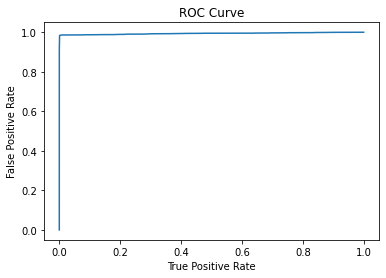

Training set areaUnderROC: 0.9938394909074526


In [13]:
# model tuning ROC
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [ ]:
# model tuning ROC
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

/home/smicro/.local/lib/python3.6/site-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


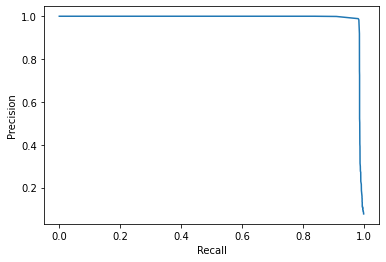

In [14]:
# model tuning # Precision & Recall
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
# ANN model https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.MultilayerPerceptronClassifier.html
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import MultilayerPerceptronClassifier
mlp = MultilayerPerceptronClassifier(layers=[2, 2, 2], seed=123)
mlp.setMaxIter(100)
mlp.getMaxIter()
mlp.getBlockSize()
mlp.setBlockSize(1)
model = mlp.fit(train)

model.setFeaturesCol("features")

model.transform(testDF).select("features", "prediction").show()
#mlpc=MultilayerPerceptronClassifier(featuresCol=’features’,labelCol=’label‘,layers = [4,16,2],\
       #                             maxIter=1000,blockSize=8,seed=7,solver=’gd’)

#mlpc=MultilayerPerceptronClassifier(featuresCol='features',labelCol='label',layers = [4,16,2],\
           #                         maxIter=1000,blockSize=8,seed=7,solver=’gd’)
    
#from pyspark.ml.classification import MLPClassifier

####mlpc=MultilayerPerceptronClassifier(featuresCol='features',labelCol='label')
#ann = mlpc.fit(train)


#from pyspark.ml.classification import GBTClassifier
#gbt = GBTClassifier(maxIter=10)
#gbtModel = gbt.fit(train)

#from pyspark.ml.classification import RandomForestClassifier
#rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
#rfModel = rf.fit(train)
#pred = ann.transform(validation_dataset1)
#evaluator = MulticlassClassificationEvaluator(labelCol='Class ',predictionCol='prediction',metricName='f1')
#ann_f1 = evaluator.evaluate(pred)
#ann_f1

In [48]:
model.setFeaturesCol("features")

In [51]:
ann = mlpc.fit(train)


Py4JJavaError: An error occurred while calling o1950.fit.
: java.util.NoSuchElementException: Failed to find a default value for layers
	at org.apache.spark.ml.param.Params.$anonfun$getOrDefault$2(params.scala:756)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.ml.param.Params.getOrDefault(params.scala:756)
	at org.apache.spark.ml.param.Params.getOrDefault$(params.scala:753)
	at org.apache.spark.ml.PipelineStage.getOrDefault(Pipeline.scala:41)
	at org.apache.spark.ml.param.Params.$(params.scala:762)
	at org.apache.spark.ml.param.Params.$$(params.scala:762)
	at org.apache.spark.ml.PipelineStage.$(Pipeline.scala:41)
	at org.apache.spark.ml.classification.MultilayerPerceptronClassifier.$anonfun$train$1(MultilayerPerceptronClassifier.scala:190)
	at org.apache.spark.ml.util.Instrumentation$.$anonfun$instrumented$1(Instrumentation.scala:191)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.ml.util.Instrumentation$.instrumented(Instrumentation.scala:191)
	at org.apache.spark.ml.classification.MultilayerPerceptronClassifier.train(MultilayerPerceptronClassifier.scala:184)
	at org.apache.spark.ml.classification.MultilayerPerceptronClassifier.train(MultilayerPerceptronClassifier.scala:93)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:151)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:115)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [ ]:
#STEP-12 accuracy of the GBTClassifier 
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# Make predicitons
predictionAndTarget = ann.transform(test).select("failure", "prediction")

predictionAndTargetNumpy = np.array((predictionAndTarget.collect()))

acc = accuracy_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
f1 = f1_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
precision = precision_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
recall = recall_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
auc = roc_auc_score(predictionAndTargetNumpy[:,0], predictionAndTargetNumpy[:,1])
print(acc,precision,recall,f1,auc) # GBTClassifier

In [ ]:
#STEP-13 predictions with validation data   
#STEP-13 predictions with validation data  # failure # label
predictions = ann.transform(validation_dataset1)
final1=predictions.select('model', 'failure', 'rawPrediction', 'prediction', 'probability')
#row_number = final1.count()
#row_number
from pyspark.sql.types import LongType
from pyspark.sql import Row
def zipindexdf(df):
    schema_new = df.schema.add("index", LongType(), False)
    return df.rdd.zipWithIndex().map(lambda l: list(l[0]) + [l[1]]).toDF(schema_new)

validation_serial_number_index = zipindexdf(validation_serial_number)
#validation_serial_number_index.show()
final1_index = zipindexdf(final1)
#final_index.show()
final1_model_results = validation_serial_number_index.join(final1_index, "index", "inner")
final1_model_results = final1_model_results.withColumnRenamed("rawPrediction", "Confidence_Level")
final1_model_results.show()

# STEP-14 Download the predictions results
pandasDF = final1_model_results.toPandas()
#pandasDF.label.replace((0, 1), ('Active', 'fail'), inplace=True)
pandasDF.failure.replace((0, 1), ('Active', 'fail'), inplace=True)
pandasDF.prediction.replace((0, 1), ('Active', 'Predicted_to_be_fail'), inplace=True)

pandasDF['Confidence_Level'] = pandasDF['Confidence_Level'].astype('str')
pandasDF['probability'] = pandasDF['probability'].astype('str')
Confidence_Level=pandasDF['Confidence_Level'].str.split(',', expand=True)
pandasDF = pandasDF.join(Confidence_Level).drop(1, axis=1)
pandasDF = pandasDF.drop(['Confidence_Level'], 1)
pandasDF.rename(columns = {0:'Confidence_Level'}, inplace = True)
probability1=pandasDF['probability'].str.split(',', expand=True)
probability1.rename(columns = {0:'Active_Probability'}, inplace = True)
probability1.rename(columns = {1:'Failure_Probability'}, inplace = True)
pandasDF = pandasDF.join(probability1)
pandasDF = pandasDF.drop(['probability'], 1)
pandasDF = pandasDF.drop(['index'], 1)
pandasDF.rename(columns = {'serial_number':'Serial_Number'}, inplace = True)
pandasDF.rename(columns = {'model':'Model'}, inplace = True)
pandasDF.rename(columns = {'label':'Actaul'}, inplace = True)
pandasDF.rename(columns = {'prediction':'Prediction'}, inplace = True)
pandasDF=pandasDF.replace('\]','',regex=True).astype(str)
pandasDF=pandasDF.replace('\[','',regex=True).astype(str)

#pandasDF=pandasDF.groupby(['Serial_Number']).min()

pandasDF.sort_values(by=['Prediction'], inplace=True, ascending=False)
pandasDF.sort_values(by=['Active_Probability'], inplace=True)
# download csv file 
pandasDF.to_csv(r'E:\home\smicro\ML-Ganesh\modelPrediction\Prediction_Results.csv')
# download excel file 
#pandasDF = final1_model_results.toPandas()
writer = pd.ExcelWriter("Prediction_Results_ML.xlsx")
pandasDF.to_excel(excel_writer=writer, sheet_name='Sheet1', na_rep="")
writer.save()